In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/districtwise-ground-water-resources-by-july-2017/Dynamic_2017_2_0.csv
/kaggle/input/water-potability/water_potability.csv


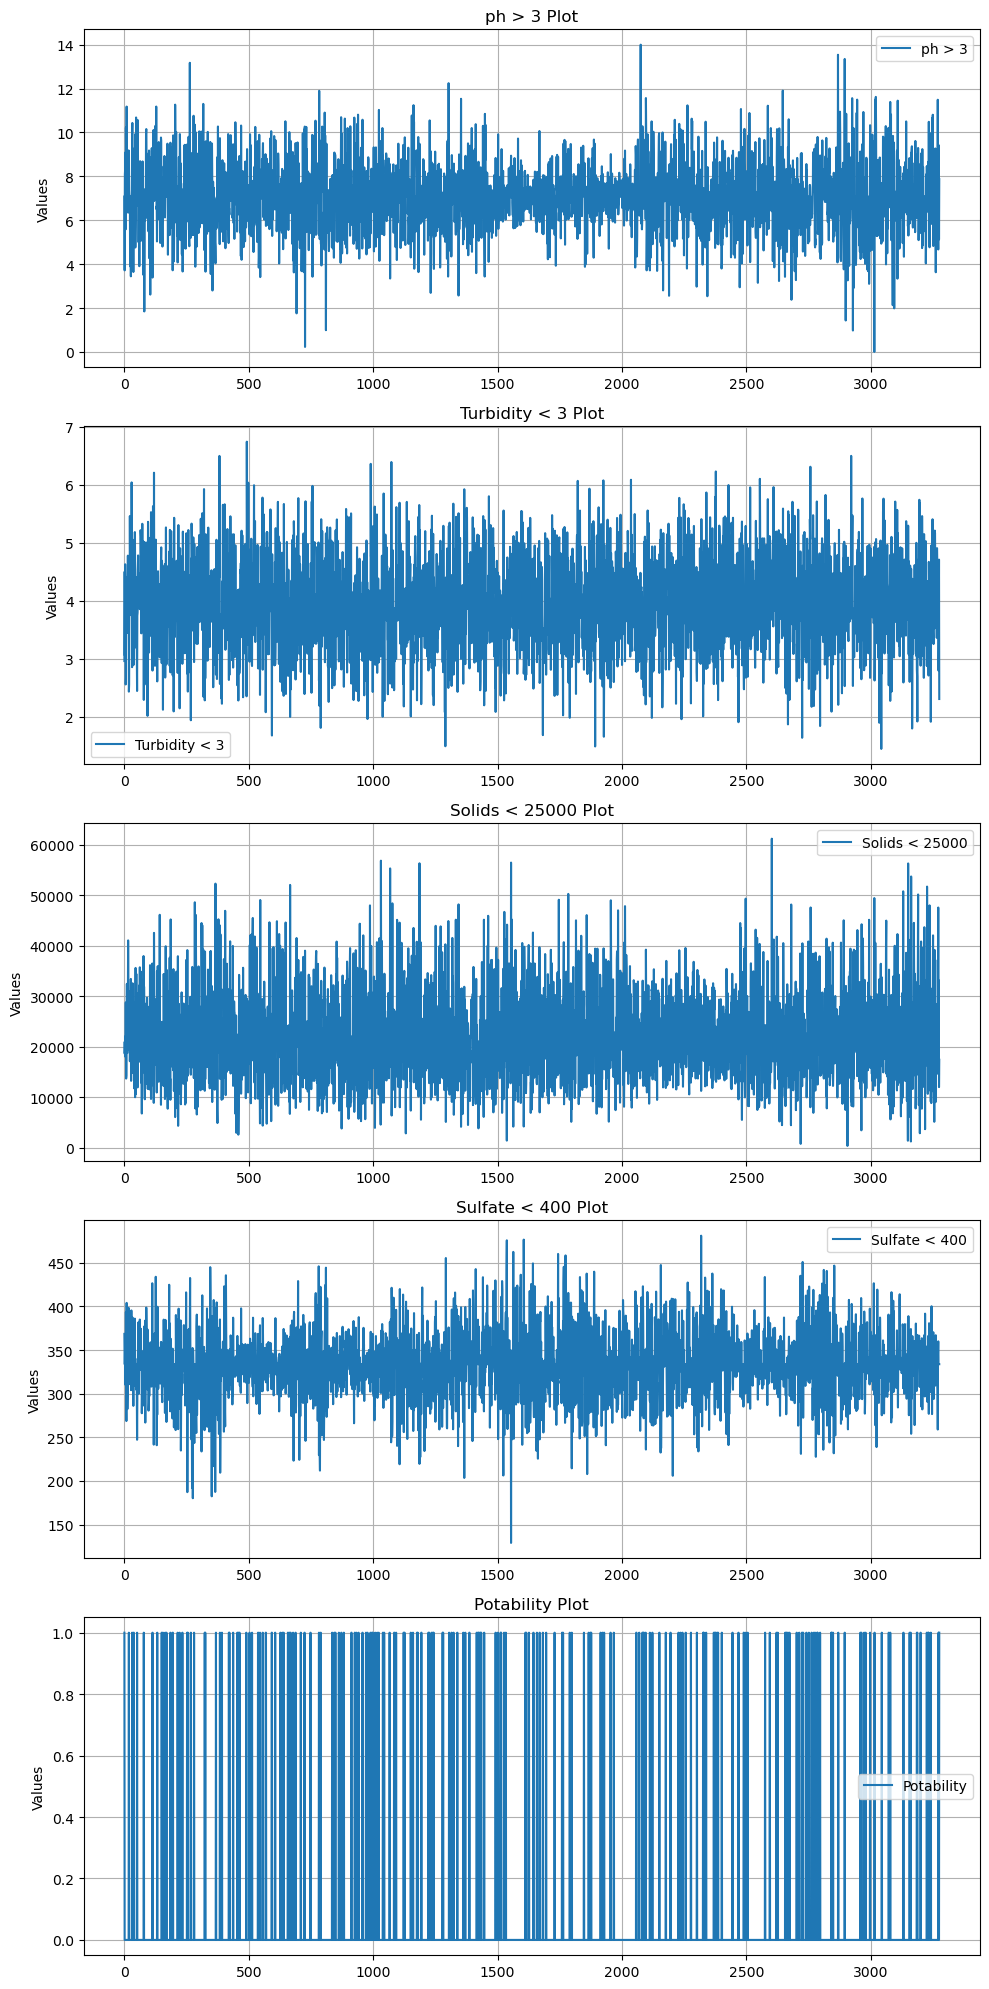

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


water_potability = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

#fillling missing values with the mean column values
column_means = water_potability.apply(pd.to_numeric, errors='coerce').mean()
water_potability = water_potability.fillna(column_means)

#layout for deciding potability
conditions = (water_potability['ph'] > 3) & (water_potability["Turbidity"] <3) & (water_potability["Solids"]<25000) & (water_potability["Sulfate"]<400)

# Calculate "Potability" based on conditions
water_potability['Potability'] = np.where(conditions, 1, 0)

new_data = pd.DataFrame(water_potability)
new_data.head(20)

# Plotting the conditions
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

conditions_columns = ['ph', 'Turbidity', 'Solids', 'Sulfate', 'Potability']
condition_labels = ['ph > 3', 'Turbidity < 3', 'Solids < 25000', 'Sulfate < 400', 'Potability']

for idx, col in enumerate(conditions_columns):
    axes[idx].plot(new_data[col], label=condition_labels[idx])
    axes[idx].set_ylabel('Values')
    axes[idx].set_title(f'{condition_labels[idx]} Plot')
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.show()





